In [19]:
# Uncomment and run this cell if you don't have DEAP or matplotlib installed (or haven't ran requirements.txt yet).
# !pip install deap matplotlib matplotlib

In [20]:
import random

import matplotlib.pyplot as plt
# Import necessary libraries
from deap import base, creator, tools

In [21]:
# Define letter frequencies
letter_frequency = {'a': 8.17, 'b': 1.49, 'c': 2.78, 'd': 4.25, 'e': 12.70, 'f': 2.23, 'g': 2.02,
                    'h': 6.09, 'i': 6.97, 'j': 0.15, 'k': 0.77, 'l': 4.03, 'm': 2.41, 'n': 6.75,
                    'o': 7.51, 'p': 1.93, 'q': 0.10, 'r': 5.99, 's': 6.33, 't': 9.06, 'u': 2.76,
                    'v': 0.98, 'w': 2.36, 'x': 0.15, 'y': 1.97, 'z': 0.07}


In [22]:
def fitness_function(layout):
    # Example cost calculation (this is just a placeholder)
    cost = 0
    for i, letter in enumerate(layout):
        cost += letter_frequency.get(letter, 0) * i
    return (cost,)  # Note the tuple here

In [23]:
# Define the problem as a minimization problem
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", list, fitness=creator.FitnessMin)

In [24]:
# Define the individual and population
toolbox = base.Toolbox()
toolbox.register("attr_char", random.choice, list(letter_frequency.keys()))
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_char, n=len(letter_frequency))
toolbox.register("population", tools.initRepeat, list, toolbox.individual)
toolbox.register("evaluate", fitness_function)
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutShuffleIndexes, indpb=0.2)
toolbox.register("select", tools.selTournament, tournsize=3)

In [25]:
# Method for visualising keyboard
def visualize_keyboard(layout):
    # Define keyboard dimensions (example for a QWERTY layout)
    rows = [10, 9, 7]  # Number of keys in each row
    y_offsets = [0, 1, 2]  # Vertical offsets for each row

    # Create a figure and axis
    fig, ax = plt.subplots(figsize=(12, 4))
    
    # Plot each key in the layout
    key_width = 1
    key_height = 1
    for i, row in enumerate(rows):
        for j in range(row):
            key = layout[i * row + j] if i * row + j < len(layout) else ""
            x = j * key_width
            y = y_offsets[i] * key_height
            ax.add_patch(plt.Rectangle((x, y), key_width, key_height, edgecolor='black', facecolor='lightgray'))
            ax.text(x + 0.5, y + 0.5, key, ha='center', va='center', fontsize=12)

    # Set limits and labels
    ax.set_xlim(0, sum(rows) * key_width)
    ax.set_ylim(0, len(rows) * key_height)
    ax.set_aspect('equal')
    ax.axis('off')  # Turn off the axis

    plt.title('Keyboard Layout Visualization')
    plt.show()


In [26]:
def main():
    population = toolbox.population(n=300)
    ngen = 40
    cxpb, mutpb = 0.5, 0.2

    print("Starting the evolution process...")

    for gen in range(1, ngen + 1):
        offspring = toolbox.select(population, len(population))
        offspring = list(map(toolbox.clone, offspring))

        for child1, child2 in zip(offspring[::2], offspring[1::2]):
            if random.random() < cxpb:
                toolbox.mate(child1, child2)
                del child1.fitness.values
                del child2.fitness.values

        for mutant in offspring:
            if random.random() < mutpb:
                toolbox.mutate(mutant)
                del mutant.fitness.values

        invalid_ind = [ind for ind in population if not ind.fitness.valid]
        fitnesses = map(toolbox.evaluate, invalid_ind)
        for ind, fit in zip(invalid_ind, fitnesses):
            ind.fitness.values = fit
            # Debugging: Print fitness values
            print(f"Individual: {ind}, Fitness: {ind.fitness.values}")

        population[:] = offspring

        # Ensure fitness values are correctly handled
        try:
            fits = [ind.fitness.values[0] for ind in population]
        except IndexError:
            print("Error: Fitness values tuple is missing or malformed.")
            continue

        length = len(population)
        mean = sum(fits) / length
        sum2 = sum(x*x for x in fits)
        std = abs(sum2 / length - mean**2)**0.5

        print(f"Generation {gen}:")
        print(f"  Min fitness: {min(fits)}")
        print(f"  Max fitness: {max(fits)}")
        print(f"  Avg fitness: {mean}")
        print(f"  Std deviation: {std}")

    # Return the best individual
    best_individual = tools.selBest(population, 1)[0]
    return best_individual


Starting the evolution process...
Individual: ['x', 't', 'o', 's', 'd', 'w', 'l', 'a', 'c', 'p', 'i', 'z', 'h', 'r', 'x', 'r', 'm', 'i', 'd', 'm', 'k', 'r', 'v', 'z', 'e', 'h'], Fitness: (1406.9699999999998,)
Individual: ['m', 'q', 'p', 'b', 'f', 'g', 'e', 'e', 's', 'i', 'v', 'n', 'j', 'a', 'o', 'd', 'j', 'o', 'q', 'p', 't', 't', 'h', 'e', 'd', 'o'], Fitness: (1922.6999999999998,)
Individual: ['x', 'g', 't', 'e', 'v', 'n', 's', 'c', 'm', 't', 'f', 'n', 'k', 's', 'e', 'q', 'k', 'o', 'x', 't', 'd', 'x', 'c', 'd', 'v', 'f'], Fitness: (1262.7100000000003,)
Individual: ['e', 'p', 'c', 'j', 'i', 'l', 'q', 'l', 'r', 'd', 'c', 'a', 'd', 'o', 'q', 'q', 'f', 'c', 'y', 'p', 'i', 'h', 'z', 'd', 's', 'o'], Fitness: (1301.47,)
Individual: ['v', 'z', 's', 'g', 't', 'f', 'm', 'p', 'z', 'i', 'c', 'z', 'p', 'k', 'a', 'k', 'e', 'w', 'g', 'm', 'k', 'd', 'z', 'a', 'e', 'c'], Fitness: (1338.9799999999998,)
Individual: ['d', 'k', 'w', 'n', 'b', 'b', 'u', 'c', 'c', 'q', 'd', 'i', 'q', 'l', 'j', 'u', 'r', 'x',

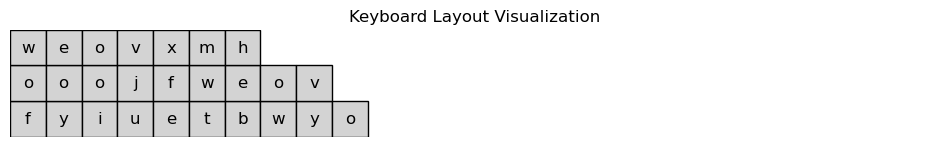

In [27]:
# Run and visualise the keyboard
best_layout = main()
visualize_keyboard(best_layout)